# Mental health survey and predictor project #

In [34]:
#Imports:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('bright')
import statsmodels.api as sm

In [35]:
#set directory
os.chdir('C:\\Users\\tgsog\\OneDrive\\Desktop\\Project portfolio')
path = "C:\\Users\\tgsog\\OneDrive\\Desktop\\Project portfolio\\Mental health surver  - CA final project\MentalHealthSurvey.csv"
df = pd.read_csv(path)

In [36]:
df.head()

,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,...,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities
0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,Off-Campus,No,No Sports,...,5,4,5,4,3,2,1,1,2,"Religious Activities, Social Connections, Onli..."
1,Male,20,UET,Postgraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,No,1-3 times,...,5,4,4,1,3,3,3,3,4,Online Entertainment
2,Male,20,FAST,Undergraduate,Computer Science,3rd year,2.5-3.0,Off-Campus,No,1-3 times,...,5,5,5,3,4,2,3,3,1,"Religious Activities, Sports and Fitness, Onli..."
3,Male,20,UET,Undergraduate,Computer Science,3rd year,2.5-3.0,On-Campus,No,No Sports,...,3,5,4,4,1,5,5,5,3,Online Entertainment
4,Female,20,UET,Undergraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,Yes,No Sports,...,3,5,5,2,3,5,5,4,4,Online Entertainment


## information about dataset ##

There is a lot of categorical information (gender, university, degree, academic year, cgpa, residential status, discrimination, sports engagement, stress relief) where we could one-hot encode them and make the dataset quite large in terms of variables. 

- Demographic= details such as gender, age, and university.
- Academic details like degree level, major, academic year, and current CGPA.
- Student's residential status and experiences with discrimination, harassment, or bullying on campus.
- Student's lifestyle factors include frequency of sports engagement and average sleep hours per night.
- Student's satisfaction with their field of study and their perception of academic workload.
- Addressing the academic pressure, financial concerns, and the quality of social relationships on campus.
- Frequency of experiencing depression, anxiety, feelings of isolation, and insecurity about the future.
- Activities that students engage in to relieve stress.

## clean the dataset ##

In [37]:
#checking the data 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    87 non-null     object
 1   age                       87 non-null     int64 
 2   university                87 non-null     object
 3   degree_level              87 non-null     object
 4   degree_major              87 non-null     object
 5   academic_year             87 non-null     object
 6   cgpa                      87 non-null     object
 7   residential_status        87 non-null     object
 8   campus_discrimination     87 non-null     object
 9   sports_engagement         87 non-null     object
 10  average_sleep             87 non-null     object
 11  study_satisfaction        87 non-null     int64 
 12  academic_workload         87 non-null     int64 
 13  academic_pressure         87 non-null     int64 
 14  financial_concerns        87

In [38]:
#count NA values
df.isna().sum()

gender                      0
age                         0
university                  0
degree_level                0
degree_major                0
academic_year               0
cgpa                        0
residential_status          0
campus_discrimination       0
sports_engagement           0
average_sleep               0
study_satisfaction          0
academic_workload           0
academic_pressure           0
financial_concerns          0
social_relationships        0
depression                  0
anxiety                     0
isolation                   0
future_insecurity           0
stress_relief_activities    0
dtype: int64

In [39]:
#checking the data 2
df.describe()

,age,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,19.942529,3.931034,3.885057,3.781609,3.390805,2.781609,3.218391,3.218391,3.241379,3.011494
std,1.623636,1.043174,0.854880,1.125035,1.400634,1.175578,1.367609,1.297809,1.405682,1.385089
min,17.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,3.000000,3.000000,3.000000,2.500000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,20.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,21.000000,5.000000,4.500000,5.000000,5.000000,4.000000,4.000000,4.000000,4.500000,4.000000
max,26.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [40]:
# unique values:
l ={}
for x in df.columns:
    l.update([(str(x),df[x].unique())])
l

{'gender': array(['Male', 'Female'], dtype=object),
 'age': array([20, 26, 22, 23, 21, 19, 18, 17], dtype=int64),
 'university': array(['PU', 'UET', 'FAST', 'COMSATS', 'NUST', 'VU', 'UMT', 'UOL', 'KUST'],
       dtype=object),
 'degree_level': array(['Undergraduate', 'Postgraduate'], dtype=object),
 'degree_major': array(['Data Science', 'Computer Science', 'Software Engineering',
        'Information Technology'], dtype=object),
 'academic_year': array(['2nd year', '3rd year', '1st year', '4th year'], dtype=object),
 'cgpa': array(['3.0-3.5', '2.5-3.0', '3.5-4.0', '1.5-2.0', '2.0-2.5', '0.0-0.0'],
       dtype=object),
 'residential_status': array(['Off-Campus', 'On-Campus'], dtype=object),
 'campus_discrimination': array(['No', 'Yes'], dtype=object),
 'sports_engagement': array(['No Sports', '1-3 times', '7+ times', '4-6 times'], dtype=object),
 'average_sleep': array(['4-6 hrs', '2-4 hrs', '7-8 hrs'], dtype=object),
 'study_satisfaction': array([5, 3, 4, 1, 2], dtype=int64),
 'acade

In [41]:
df_d = pd.get_dummies(data = df, columns = ['gender','university','degree_level','degree_major','academic_year','cgpa','residential_status','campus_discrimination','sports_engagement','average_sleep'])

In [42]:
df_d_x = df_d.drop(columns=["depression","stress_relief_activities"])

In [55]:
l_bools =[]
for col in df_d_x.columns:
    if df_d_x[col].dtype == bool:
        l_bools.append(col)
        
l_bools

for x in l_bools:
    df_d_x[x] =df_d_x[x].astype("int64") 
df_d_x.dtypes

age                                    int64
study_satisfaction                     int64
academic_workload                      int64
academic_pressure                      int64
financial_concerns                     int64
social_relationships                   int64
anxiety                                int64
isolation                              int64
future_insecurity                      int64
gender_Female                          int64
gender_Male                            int64
university_COMSATS                     int64
university_FAST                        int64
university_KUST                        int64
university_NUST                        int64
university_PU                          int64
university_UET                         int64
university_UMT                         int64
university_UOL                         int64
university_VU                          int64
degree_level_Postgraduate              int64
degree_level_Undergraduate             int64
degree_maj

## Making some graphs ##

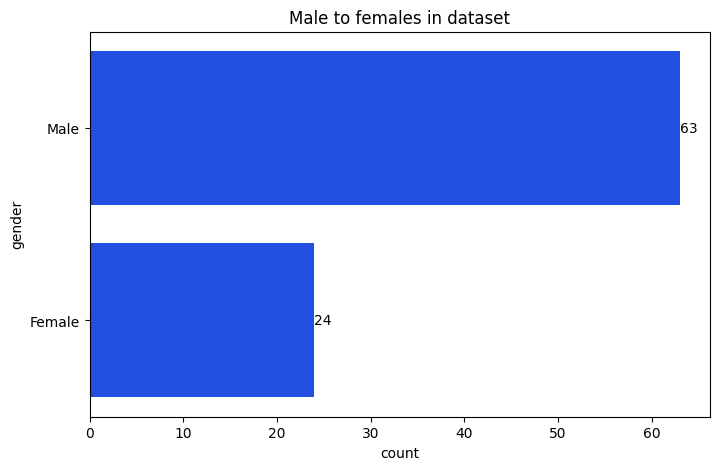

In [172]:
#Male to females in dataset
plt.figure(figsize = (8,5))
ax = sns.countplot(df.gender)

plt.title("Male to females in dataset")
ax.bar_label(ax.containers[0])

plt.show()
plt.close()

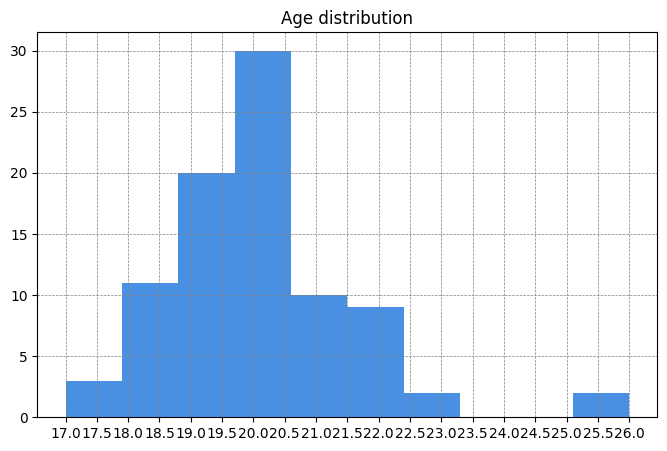

In [171]:
plt.figure(figsize = (8,5))
ax2= plt.hist(df.age,bins =10, color ="#4A90E2")

plt.grid(True)
plt.grid(color = "gray", linestyle ="--", linewidth =0.5)
plt.locator_params(axis='x', nbins=20)
plt.title("Age distribution")

plt.show()
plt.close()

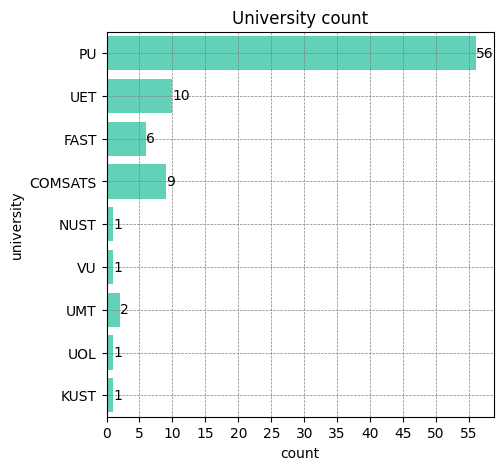

In [170]:
plt.figure(figsize = (5,5))
ax2= sns.countplot(df.university, color ="#50E3C2")

plt.locator_params(axis='x', nbins=20)
plt.grid(True)
plt.grid(color = "gray", linestyle ="--", linewidth =0.5)
plt.title("University count")
ax2.bar_label(ax2.containers[0])

plt.show()
plt.close()

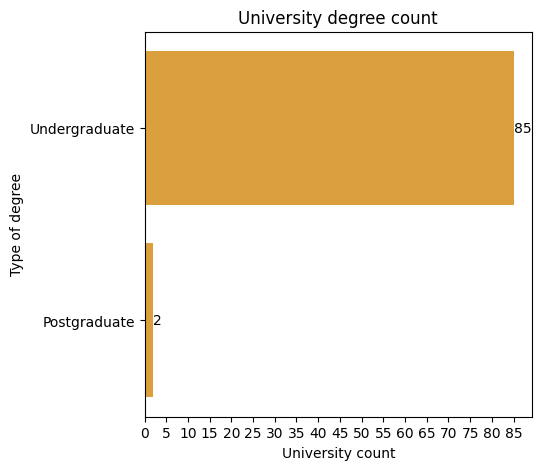

In [169]:
plt.figure(figsize = (5,5))
ax3 =sns.countplot(df.degree_level, color = "#F5A623")

plt.locator_params(axis='x', nbins=20)
plt.title("University degree count")
ax3.bar_label(ax3.containers[0])
plt.xlabel("University count")
plt.ylabel("Type of degree")

plt.show()
plt.close()

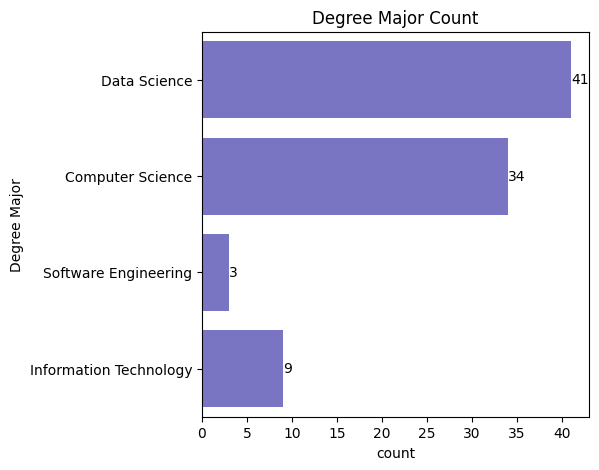

In [168]:
plt.figure(figsize = (5,5))
ax4 = sns.countplot(df.degree_major, color="#6F68D0")
plt.title("Degree Major Count")
plt.ylabel("Degree Major")
plt.locator_params(axis='x', nbins=10)
ax4.bar_label(ax4.containers[0])

plt.show()
plt.close()

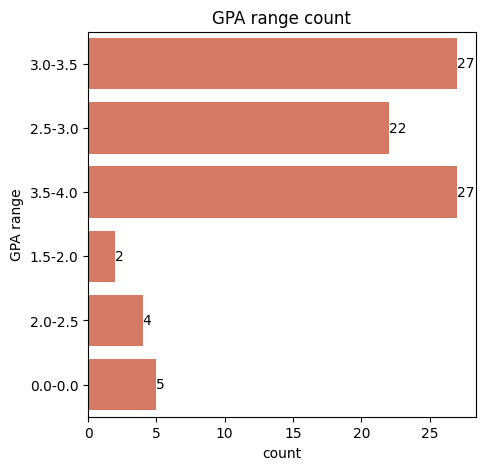

In [167]:
plt.figure(figsize=(5,5))
ax5 =sns.countplot(df.cgpa, color = "#E76F51")

plt.title("GPA range count")
plt.ylabel("GPA range")
plt.locator_params(axis='x', nbins=10)
ax5.bar_label(ax5.containers[0])

plt.show()
plt.close()

## Making linear regression ##

In [56]:
X_wo_constant = df_d_x
y = df_d["depression"].reset_index().drop(columns = ["index"])

In [57]:
X= sm.add_constant(X_wo_constant)

In [59]:
model1 = sm.OLS(y,X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             depression   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     11.28
Date:                Wed, 18 Sep 2024   Prob (F-statistic):           4.99e-14
Time:                        18:57:24   Log-Likelihood:                -52.156
No. Observations:                  87   AIC:                             180.3
Df Residuals:                      49   BIC:                             274.0
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.4978      0.392     -1.271      0.210      -1.285       0.289
age                                     0.0166      0.073      0.227      0.821      -0.130       0.163
study_satisfaction                     -0.1197      0.087     -1.371      0.177      -0.295       0.056
academic_workload                       0.3207      0.126      2.547      0.014       0.068       0.574
academic_pressure                       0.1512      0.085      1.770      0.083      -0.021       0.323
financial_concerns                      0.1233      0.062      1.980      0.053      -0.002       0.248
social_relationships                    0.1658      0.086      1.923      0.060      -0.008       0.339
anxiety                                 0.5592      0.094      5.977      0.000       0.371       0.747
isolation                               0.3666      0.092      4.003      0.000       0.183       0.551
future_insecurity                      -0.0228      0.075     -0.303      0.763      -0.174       0.128
gender_Female                          -0.2906      0.212     -1.370      0.177      -0.717       0.136
gender_Male                            -0.2072      0.228     -0.908      0.368      -0.666       0.251
university_COMSATS                      0.2673      0.291      0.918      0.363      -0.318       0.852
university_FAST                        -0.2054      0.398     -0.516      0.608      -1.005       0.594
university_KUST                        -0.2408      1.014     -0.237      0.813      -2.279       1.798
university_NUST                         0.1153      0.655      0.176      0.861      -1.202       1.432
university_PU                          -0.3195      0.380     -0.840      0.405      -1.084       0.445
university_UET                          0.2719      0.360      0.756      0.453      -0.451       0.994
university_UMT                          0.2501      0.506      0.494      0.623      -0.767       1.267
university_UOL                         -0.3465      0.677     -0.512      0.611      -1.706       1.014
university_VU                          -0.2902      0.839     -0.346      0.731      -1.976       1.395
degree_level_Postgraduate               0.1288      0.410      0.315      0.754      -0.694       0.952
degree_level_Undergraduate             -0.6266      0.244     -2.571      0.013      -1.116      -0.137
degree_major_Computer Science           0.2329      0.374      0.623      0.536      -0.518       0.984
degree_major_Data Science               0.4666      0.379      1.230      0.225      -0.296       1.229
degree_major_Information Technology    -0.3894      0.368     -1.058      0.295      -1.129       0.350
degree_major_Software Engineering      -0.8078      0.569     -1.41

In [61]:
# Extract the coefficients, standard errors, and p-values
coefficients = model1.params  # Coefficients of the model
std_errors = model1.bse       # Standard errors of the coefficients
p_values = model1.pvalues     # p-values of the coefficients
conf_intervals = model1.conf_int()  # Confidence intervals for the coefficients

regression_results = pd.DataFrame({
    'Coefficients': coefficients,
    'Standard Errors': std_errors,
    'P-Values': p_values,
    'Confidence Interval Lower': conf_intervals[0],
    'Confidence Interval Upper': conf_intervals[1]
})

# Display the results in a DataFrame-like format
regression_results

,Coefficients,Standard Errors,P-Values,Confidence Interval Lower,Confidence Interval Upper
const,-0.497757,0.391563,2.096574e-01,-1.284632,0.289119
age,0.016612,0.073077,8.211237e-01,-0.130243,0.163466
study_satisfaction,-0.119692,0.087281,1.765158e-01,-0.295091,0.055706
academic_workload,0.320722,0.125911,1.404865e-02,0.067694,0.573749
academic_pressure,0.151221,0.085452,8.300602e-02,-0.020501,0.322944
financial_concerns,0.123304,0.062287,5.337938e-02,-0.001867,0.248475
social_relationships,0.165822,0.086250,6.035542e-02,-0.007503,0.339148
anxiety,0.559226,0.093569,2.542741e-07,0.371193,0.747260
isolation,0.366569,0.091565,2.112016e-04,0.182562,0.550575
future_insecurity,-0.022803,0.075228,7.630850e-01,-0.173980,0.128374


optimised_regression

In [73]:
reg_alpha05 = regression_results[regression_results["P-Values"]<0.05]
opt_cols =reg_alpha05.index
model2 = sm.OLS(y,X[opt_cols]).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             depression   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              429.8
Date:                Wed, 18 Sep 2024   Prob (F-statistic):                    3.21e-59
Time:                        19:08:58   Log-Likelihood:                         -80.402
No. Observations:                  87   AIC:                                      172.8
Df Residuals:                      81   BIC:                                      187.6
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
academic_workload               0.2861      0.081      3.551      0.001       0.126       0.446
anxiety                         0.6836      0.078      8.804      0.000       0.529       0.838
isolation                       0.2489      0.066      3.792      0.000       0.118       0.380
degree_level_Undergraduate     -0.6880      0.278     -2.474      0.015      -1.241      -0.135
academic_year_3rd year         -0.2827      0.151     -1.872      0.065      -0.583       0.018
sports_engagement_1-3 times    -0.5170      0.161     -3.215      0.002      -0.837      -0.197
==============================================================================
Omnibus:                        5.728   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                8.413
Skew:                          -0.128   Prob(JB):                       0.0149
Kurtosis:                       4.502   Cond. No.                         26.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
# Extract the coefficients, standard errors, and p-values
coefficients = model2.params  # Coefficients of the model
std_errors = model2.bse       # Standard errors of the coefficients
p_values = model2.pvalues     # p-values of the coefficients
conf_intervals = model2.conf_int()  # Confidence intervals for the coefficients

regression_results = pd.DataFrame({
    'Coefficients': coefficients,
    'Standard Errors': std_errors,
    'P-Values': p_values,
    'Confidence Interval Lower': conf_intervals[0],
    'Confidence Interval Upper': conf_intervals[1]
})

# Display the results in a DataFrame-like format
regression_results

,Coefficients,Standard Errors,P-Values,Confidence Interval Lower,Confidence Interval Upper
academic_workload,0.286091,0.080559,6.419426e-04,0.125805,0.446378
anxiety,0.683597,0.077650,1.943540e-13,0.529098,0.838097
isolation,0.248919,0.065648,2.868854e-04,0.118299,0.379538
degree_level_Undergraduate,-0.687977,0.278083,1.545040e-02,-1.241274,-0.134680
academic_year_3rd year,-0.282712,0.151015,6.480492e-02,-0.583185,0.017761
sports_engagement_1-3 times,-0.516983,0.160784,1.872051e-03,-0.836891,-0.197074


In [174]:
coefs = regression_results.Coefficients.sort_values()
coefs

degree_level_Undergraduate    -0.687977
sports_engagement_1-3 times   -0.516983
academic_year_3rd year        -0.282712
isolation                      0.248919
academic_workload              0.286091
anxiety                        0.683597
Name: Coefficients, dtype: float64

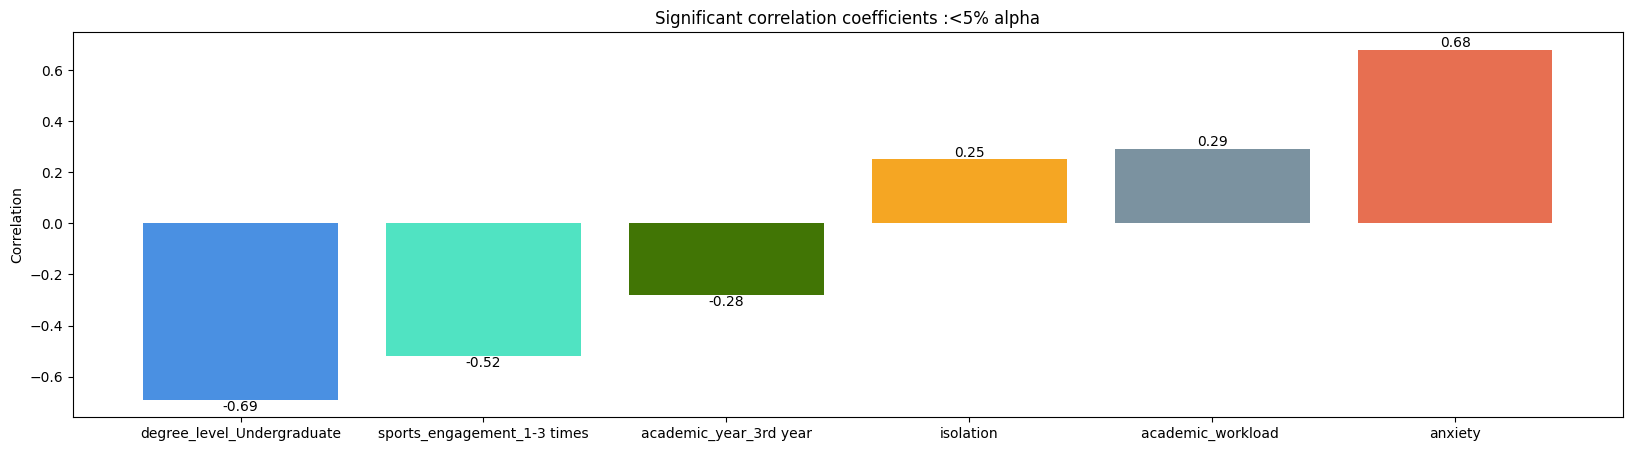

<Figure size 640x480 with 0 Axes>

In [204]:
#Significant correlation coefficients
fig, ax = plt.subplots(1,1, figsize = (20,5))
plt.title("Significant correlation coefficients :<5% alpha")
plt.ylabel("Correlation")
plt.locator_params(axis='x', nbins=20)
bars =plt.bar(x = coefs.index, height = [round(x,2) for x in coefs.values], color=['#4A90E2', '#50E3C2', '#417505', '#F5A623', '#7B92A0', "#E76F51"])
ax.bar_label(bars)

plt.show()

plt.savefig("Mental health - Significant Correlation coefficients.png", dpi=300, bbox_inches='tight') 